## Analyzing Exit Survey Data from Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia

In this project, we will try to investigate the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [1]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv("dete_survey.csv", index_col=0)
tafe_survey = pd.read_csv("tafe_survey.csv", index_col=0)

print(dete_survey.info())
print(dete_survey.head())
print(tafe_survey.info())
print(tafe_survey.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 822 entries, 1 to 823
Data columns (total 55 columns):
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environment              822 non-null bool
Lack of recognition   

From preliminary observation, there is a lot of missing data in both dataframes. It should also be noted that both dataframes contain many columns that we don't need to complete our analysis. 

The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.

Moreover, each dataframe contains many of the same columns, but the column names are different. There are many columns/answers that indicate an employee resigned because they were dissatisfied.

In [2]:
# We will read the dete_survey.csv CSV file into pandas again, but this time read the Not Stated values in as NaN.
dete_survey = pd.read_csv("dete_survey.csv", index_col=0, na_values = 'Not Stated')

# drop some columns from each dataframe that won't be used in the analysis
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)


In the above, after our data exploration, we've chosen to drop columns from each dataframe that we won't use in our analysis to make the dataframes easier to work with.

In [3]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.replace('\s+', '').str.lower()
print(dete_survey_updated.columns)

mapping = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date',
           'Reason for ceasing employment': 'separationtype',
           'Gender. What is your Gender?': 'gender',
           'CurrentAge. Current Age': 'age',
           'Employment Type. Employment Type': 'employment_status',
           'Classification. Classification': 'position',
           'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
           'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
           
tafe_survey_updated = tafe_survey_updated.rename(columns=mapping)

tafe_survey_updated.head()

Index(['separationtype', 'cease_date', 'dete_start_date', 'role_start_date',
       'position', 'classification', 'region', 'business_unit',
       'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'professional_development', 'age', 'aboriginal',
       'torres_strait', 'south_sea', 'disability', 'nesb'],
      dtype='object')


,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,age,employment_status,position,institute_service,role_service
Record ID,,,,,,,,,,,,,,,,,,,,,
6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,26 30,Temporary Full-time,Administration (AO),1-2,1-2
6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,...,-,-,-,-,NaN,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [4]:
dete_survey_updated.head()

,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,...,work_life_balance,workload,none_of_the_above,professional_development,age,aboriginal,torres_strait,south_sea,disability,nesb
ID,,,,,,,,,,,,,,,,,,,,,
1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,...,False,False,True,A,56-60,NaN,NaN,NaN,NaN,Yes
2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,...,False,False,False,A,56-60,NaN,NaN,NaN,NaN,NaN
3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,...,False,False,True,N,61 or older,NaN,NaN,NaN,NaN,NaN
4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,...,False,False,False,A,36-40,NaN,NaN,NaN,NaN,NaN
5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,...,True,False,False,A,61 or older,NaN,NaN,NaN,NaN,NaN


We've renamed the columns that we'll use in our analysis. Next, let's remove more of the data we don't need.

If we look at the unique values in the 'separationtype' columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who _resigned_, so their separation type contains the string 'Resignation'.

There are 3 separation types with the string 'Resignation', namely:
- Resignation-Other reasons
- Resignation-Other employer
- Resignation-Move overseas/interstate

In [5]:
# Review unique values in the 'separationtype' column for both dataframes

dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [6]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [7]:
pattern = r"([Resignation])" 
dete_resignations = dete_survey_updated[
    dete_survey_updated['separationtype'].str.contains('Resignation')].copy()
tafe_resignations = tafe_survey_updated[
    tafe_survey_updated['separationtype'].str.contains('Resignation', na = False)].copy()
tafe_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 340 entries, 6.3413990335e+17 to 6.35073030973791e+17
Data columns (total 22 columns):
Institute                                                       340 non-null object
WorkArea                                                        340 non-null object
cease_date                                                      335 non-null float64
separationtype                                                  340 non-null object
Contributing Factors. Career Move - Public Sector               332 non-null object
Contributing Factors. Career Move - Private Sector              332 non-null object
Contributing Factors. Career Move - Self-employment             332 non-null object
Contributing Factors. Ill Health                                332 non-null object
Contributing Factors. Maternity/Family                          332 non-null object
Contributing Factors. Dissatisfaction                           332 non-null object
Contributing Factors

For the TAFE data set, there were NaN values which we replaced with False for the Boolean indexing to be done without errors. 

Now, before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies (to the best of our knowledge). We'll focus on verifying that the years in the cease_date and dete_start_date columns make sense.

We will be using the following guiding principles:

- Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.

- Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

In [8]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
07/2006      1
09/2010      1
Name: cease_date, dtype: int64

In [9]:
# Extracing the year using vectorized string methods

dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str.get(-1).astype(float)
dete_resignations['cease_date'].value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [10]:
dete_resignations['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [11]:
tafe_resignations['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

Based on the findings above, it seems that the data generally looks fine. We could scrutinize the years further as the distribution is slightly different across the dataframes, but the effort is not warranted considering the data quality is decent

In [12]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date'] 
dete_resignations['institute_service'].value_counts().sort_index()

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

By performing the step above, we can directly scan through all the employees' length of time spent in the workplace, aka years of service. The data suggests that churn rate is higher for those serving < 10 years, as the numbers are in the double digits. The peak of churn comes in after about 5 years of service.

Next, we'll identify any employees who resigned because they were dissatisfied.

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe.

From tafe_survey_updated:
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

From detesurveyupdated:
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

If the employee indicated any of the factors above caused them to resign, we'll mark them as 'dissatisfied' in a new column.

In [13]:
# We will convert values in 'Contributing Factors. Dissatisfaction'
# and 'Contributing Factors. Job Dissatisfaction' columns in the
# 'tafe_resignations' dataframe to True, False, or NaN values.

tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [14]:
# We'll create a version to do the updating

def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True
        
tafe_resignations['dissatisfied'] = tafe_resignations[[
    'Contributing Factors. Dissatisfaction',
    'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(
    axis=1, skipna=False)

dete_res_col = ['job_dissatisfaction',
           'dissatisfaction_with_the_department',
           'physical_work_environment','lack_of_recognition',
           'lack_of_job_security','work_location',
           'employment_conditions','work_life_balance','workload']

dete_resignations['dissatisfied'] = dete_resignations[
    dete_res_col].applymap(update_vals).any(
    axis=1, skipna=False)

tafe_resignations_up = tafe_resignations.copy()
dete_resignations_up = dete_resignations.copy()

In [15]:
tafe_resignations_up.head()

,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,age,employment_status,position,institute_service,role_service,dissatisfied
Record ID,,,,,,,,,,,,,,,,,,,,,
6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,...,-,-,-,NaN,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,...,-,Other,-,NaN,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,...,-,Other,-,Career Move - Private Sector,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,...,-,Other,-,NaN,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False


In [16]:
dete_resignations_up.head()

,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,...,none_of_the_above,professional_development,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied
ID,,,,,,,,,,,,,,,,,,,,,
4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,...,False,A,36-40,NaN,NaN,NaN,NaN,NaN,7.0,True
6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,...,False,SD,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True
9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,...,False,D,31-35,NaN,NaN,NaN,NaN,NaN,3.0,True
10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,...,False,SD,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True
12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,...,False,N,31-35,NaN,NaN,NaN,NaN,NaN,3.0,True


Now, we are ready to combine our datasets! Our end goal is to aggregate the data according to the 'institute_service' column, so when we combine the data, we will think about ways to get the data into a form that's easy to aggregate.

In [17]:
# Before merging, we will add a column to each of our new dataframes so that we can distinguish between the two.

dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

dete_resignations_up.head()

,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,...,professional_development,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute
ID,,,,,,,,,,,,,,,,,,,,,
4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,...,A,36-40,NaN,NaN,NaN,NaN,NaN,7.0,True,DETE
6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,...,SD,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True,DETE
9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,...,D,31-35,NaN,NaN,NaN,NaN,NaN,3.0,True,DETE
10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,...,SD,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True,DETE
12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,...,N,31-35,NaN,NaN,NaN,NaN,NaN,3.0,True,DETE


In [18]:
tafe_resignations_up.head()

,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,...,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,age,employment_status,position,institute_service,role_service,dissatisfied,institute
Record ID,,,,,,,,,,,,,,,,,,,,,
6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False,TAFE
6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,...,-,-,NaN,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE
6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,...,Other,-,NaN,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False,TAFE
6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,...,Other,-,Career Move - Private Sector,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False,TAFE
6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,...,Other,-,NaN,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE


In [19]:
# Combining the data sets by stacking them

combined = pd.concat([dete_resignations_up,tafe_resignations_up], axis = 0, ignore_index=True)

combined.head()

,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Dissatisfaction,Contributing Factors. Ill Health,Contributing Factors. Interpersonal Conflict,Contributing Factors. Job Dissatisfaction,Contributing Factors. Maternity/Family,Contributing Factors. NONE,Contributing Factors. Other,...,role_service,role_start_date,separationtype,south_sea,study/travel,torres_strait,traumatic_incident,work_life_balance,work_location,workload
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2006.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1997.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2009.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2008.0,Resignation-Other employer,NaN,False,NaN,False,False,False,False
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2009.0,Resignation-Move overseas/interstate,NaN,False,NaN,False,False,False,False


In [20]:
# Dropping columns with < 500 non null values

combined_updated = combined.dropna(thresh= 500 , axis = 1)
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 8 columns):
age                  596 non-null object
cease_date           635 non-null float64
dissatisfied         643 non-null object
employment_status    597 non-null object
institute            651 non-null object
institute_service    563 non-null object
position             598 non-null object
separationtype       651 non-null object
dtypes: float64(1), object(7)
memory usage: 40.8+ KB


After our dataframes have been combined, we will want to clean up the 'institute_service' column. Let's examine this column in greater detail.

In [21]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
19.0                   3
39.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


To analyze the data, we'll convert these numbers into the following categories:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [22]:
# Change the entries in 'institute_service' to strings

combined_updated['institute_service'].astype(str)
yrs = r"(?P<yrs_service>[0-9]?[0-9])"

# Use vectorized str method to extract the years of service from each pattern

combined_updated['institute_service'] = combined_updated['institute_service'].str.extract(yrs, expand=False).astype(float)

# Check that we did not miss out any digits in the extraction

combined_updated['institute_service'].value_counts(dropna=False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


NaN      361
 1.0     137
 3.0      63
 5.0      33
 11.0     26
 7.0      21
 20.0     10
Name: institute_service, dtype: int64

In [23]:
# Create a function that maps each year value to one of the career stages we defined

def career_staging(val):
    if pd.isnull(val):
        return 'No Info Available'
    elif val < 3:
        return 'New'
    elif val < 7:
        return 'Experienced'
    elif val < 11:
        return 'Established'
    else:
        return 'Veteran'
    
combined_updated['service_cat'] = combined_updated['institute_service'].apply(career_staging)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [24]:
combined_updated['service_cat'].value_counts()

No Info Available    361
New                  137
Experienced           96
Veteran               36
Established           21
Name: service_cat, dtype: int64

Now we can start our analysis by filling in the missing values under the 'dissatisfied' column and aggregating the data (such as the count/percentage in each of our defined groups).

In [25]:
# Confirm the number of True and False in the 'dissatisfied' column

combined_updated['dissatisfied'].value_counts(dropna=False)

True     402
False    241
NaN        8
Name: dissatisfied, dtype: int64

In [26]:
# Since True appears most frequently in this column, let's assume all the missing values are True

combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(True)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


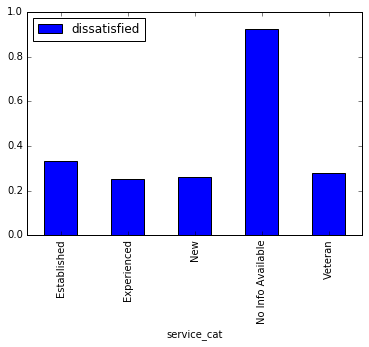

In [27]:
# Calculate the % of dissatisfied employees in each 'service_cat' group by using pivot_table() method
# Since a True value is considered to be 1, calculating the mean will also calculate the percentage of dissatisfied employees.

combinedpivot = combined_updated.pivot_table(
    values = 'dissatisfied', index = 'service_cat')

# Plotting the bar chart results

%matplotlib inline
combinedpivot.plot(kind='bar')

From our findings, it seems that those who are new tend to be less dissatisfied, and the dissatisfaction grows as employees serve longer and longer in the company.

It is also interesting to note that from our earlier analysis, the churn rate for resignations reaches a peak around the Experienced group and tapers off afterwards, so this might suggest that dissatisfaction does not necessarily lead to resignation.

Alternatively, it could also suggest that there is certain crucial data we left out which might change the dissatisfaction bar graph here.